In [2]:
import torch
from tqdm import tqdm
from PIL import Image

In [3]:
import os

BASE_PATH = f"{os.getenv('TMPDIR')}/generative_models"

if not os.path.exists(BASE_PATH):
    os.makedirs(BASE_PATH)

# Initialize StableDiffusion Pipeline

In [4]:
import torch
from diffusers import StableDiffusionPipeline


model_id = "stabilityai/stable-diffusion-2-1"

device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    revision=None,
    cache_dir=BASE_PATH,
)
pipe.enable_xformers_memory_efficient_attention()

pipe = pipe.to(device)

image_length = 768

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/cluster/home/nkoisheke/.local/lib/python3.10/site-packages/transformers/modeling_utils.py:386: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(checkpoint_file, framework="pt") as f:
/cluster/home/nkoisheke/.local/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/cluster/home/nkoisheke/.local/lib/python3.10/site-packages/torch/storage.py:899: UserWarning: TypedStorage is deprecated. It will be removed in the fu

In [4]:
# retrieve prompts

f = open("../../Prompts/filtered_prompts.txt", "r")
filtered_prompts_list = []
for x in f:
    if x.strip():
        filtered_prompts_list.append(x.strip())

In [5]:
# retrieve artists
f = open("./hist_artists.txt")
artists_list = []
for x in f:
    if x.strip():
        artists_list.append(x.strip())

In [6]:
temp_prompt = filtered_prompts_list[0][:-1]
temp_artist = artists_list[1]
prompt = f"{temp_prompt[:-1]}, {temp_artist}."
print(prompt)

An exciting and adrenaline-fueled scene of a hot air balloon race over a vast canyo, Claude Monet.


In [28]:
num_images = 4

negative_prompt = None
pipe.safety_checker = None

with torch.no_grad():
    images = pipe(
        prompt,
        height = image_length,
        width = image_length,
        num_inference_steps = 50,
        guidance_scale = 9,
        num_images_per_prompt = num_images,
        negative_prompt = negative_prompt,
    ).images

  0%|          | 0/50 [00:00<?, ?it/s]

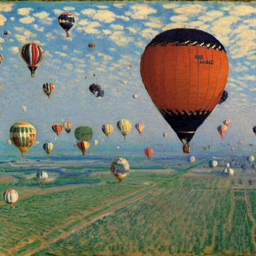

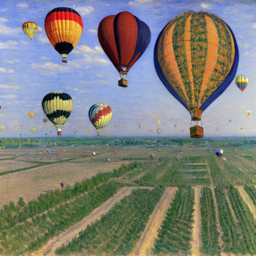

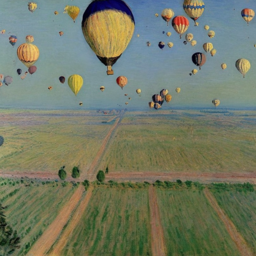

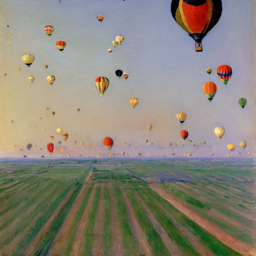

In [29]:
for im in images:
    im = im.resize((256, 256))
    display(im)

In [19]:
uid = 0

num_images = 5
negative_prompt = None
pipe.safety_checker = None

image_length = 512
num_inference_steps = 50
guidance_scale = 8.5

temp_artists_list = []
temp_prompts_list = []
temp_sd_prompts_list = []
temp_uid_list = []
temp_uid_i_list = []

temp_image_list = []

for artist in artists_list:
    for prompt in filtered_prompts_list:
        sd_prompt = f"{prompt[:-1]}, {artist}."

        with torch.no_grad():
            images = pipe(
                sd_prompt,
                height = image_length,
                width = image_length,
                num_inference_steps = num_inference_steps,
                guidance_scale = guidance_scale,
                num_images_per_prompt = num_images,
                negative_prompt = negative_prompt,
            ).images
        
        for i in range(num_images):
            temp_uid_i_list.append(i)
            temp_artists_list.append(artist)
            temp_prompts_list.append(prompt)
            temp_sd_prompts_list.append(sd_prompt)
            temp_uid_list.append(uid)
            temp_image_list.append(images[i])
            uid += 1


In [23]:
# create a dataframe
import pandas as pd

df = pd.DataFrame(
    {
        "uid": temp_uid_list,
        "i": temp_uid_i_list,
        "artist": temp_artists_list,
        "prompt": temp_prompts_list,
        "sd_prompt": temp_sd_prompts_list,
        "sd_version": "2.1",
    }
)

,uid,i,artist,prompt,sd_prompt
0,0,0,Vincent van Gogh,An exciting and adrenaline-fueled scene of a h...,An exciting and adrenaline-fueled scene of a h...
1,1,1,Vincent van Gogh,An exciting and adrenaline-fueled scene of a h...,An exciting and adrenaline-fueled scene of a h...
2,2,2,Vincent van Gogh,An exciting and adrenaline-fueled scene of a h...,An exciting and adrenaline-fueled scene of a h...
3,3,3,Vincent van Gogh,An exciting and adrenaline-fueled scene of a h...,An exciting and adrenaline-fueled scene of a h...
4,4,4,Vincent van Gogh,An exciting and adrenaline-fueled scene of a h...,An exciting and adrenaline-fueled scene of a h...
5,5,0,Vincent van Gogh,A spooky and eerie abandoned carnival scene wi...,A spooky and eerie abandoned carnival scene wi...
6,6,1,Vincent van Gogh,A spooky and eerie abandoned carnival scene wi...,A spooky and eerie abandoned carnival scene wi...
7,7,2,Vincent van Gogh,A spooky and eerie abandoned carnival scene wi...,A spooky and eerie abandoned carnival scene wi...
8,8,3,Vincent van Gogh,A spooky and eerie abandoned carnival scene wi...,A spooky and eerie abandoned carnival scene wi...
9,9,4,Vincent van Gogh,A spooky and eerie abandoned carnival scene wi...,A spooky and eerie abandoned carnival scene wi...
